<a href="https://colab.research.google.com/github/mwithgod3952/jh_Natural_language_processing/blob/main/%EC%A3%BC%EC%9A%94%EB%AA%A8%EB%8D%B8_BiLSTM__%ED%92%88%EC%82%AC%ED%83%9C%EA%B9%85(Part_of_speech_Tagging).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [3]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print(tagged_sentences)
print('='*31)
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences))

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]
품사 태깅이 된 문장 개수:  3914


***위, 기존 정보를 기준으로 단어에 해당하는 부분과, 품사에 해당하는 부분을 나누어 학습시킬 필요가 있다.***

In [4]:
# 각 문장에 대한 태깅정보가 리스트 단위로 저장되어 있음
tagged_sentences[0], tagged_sentences[1] 

([('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')])

In [5]:
sentences, pos_tags = [], [] 

for sentence in tagged_sentences:
  snt, tag_info = zip(*sentence)
  sentences.append(list(snt)) 
  pos_tags.append(list(tag_info))

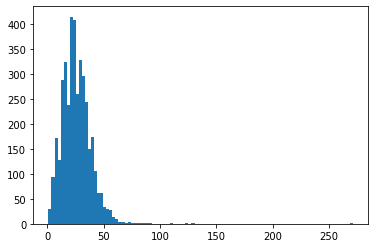

In [6]:
plt.hist([len(X) for X in sentences], bins = 100)
plt.show()

In [7]:
print('샘플의 최대길이 확인 : ', max((len(s) for s in sentences)))
print('샘플의 평균길이 : ', sum(map(len, sentences)) / len(sentences))

샘플의 최대길이 확인 :  271
샘플의 평균길이 :  25.722023505365357


In [8]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

하단이, 모델에 fitting되는 첫번째 단계이며, 우리는 모델 학습을 우해 두개의 모델을 필요로 한다는 것이 중요점인데, 문장의 요소에 관하여 그리고, 이의 구분자의 레이블 정보에 관하여 학습에 활용하도록 한다.

In [9]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [10]:
# 통상 빈도수에 기준하여 만들어진 인덱스는 전체 문장 구성에 대한 단어의 인덱스를 저장하고 있으면 페딩 정보를 고려하여 +1를 vocab size로 정의
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [11]:
# 정수인코딩 시행
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [12]:
import pandas as pd

def Structure_df(snetence_num, taged_num): 
  Structure_check = pd.DataFrame()
  Structure_check['ori_ste'] = sentences[snetence_num]
  Structure_check['encoded'] = X_train[taged_num]
  return Structure_check  

In [13]:
Structure_df(2,2)

,ori_ste,encoded
0,Rudolph,2917
1,Agnew,5603
2,",",1
3,55,1136
4,years,86
5,old,331
6,and,8
7,former,602
8,chairman,177
9,of,4


In [14]:
# 테깅

max_len = 150

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

***One-Hot-Encoding***

In [21]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

***Creating POS Tagger w, Bi-LSTM*** 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from keras.optimizers import Adam

***Embeddings***

    - nput_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
    - output_dim: Integer. Dimension of the dense embedding.
    - embeddings_initializer: Initializer for the embeddings matrix (see keras.initializers).
    - embeddings_regularizer: Regularizer function applied to the embeddings matrix (see keras.regularizers).
    - embeddings_constraint: Constraint function applied to the embeddings matrix (see keras.constraints).
    - mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1).
    - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
                              # 256 >> units: Positive integer, dimensionality of the output space. / return_sequences=True >> many_to_many 구현
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
                              # tag_size = len(tar_tokenizer.word_index) + 1 
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])                                                      

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=6,  validation_data=(X_test, y_test))

Epoch 1/6
25/25 [==============================] - 41s 148ms/step - loss: 0.6180 - accuracy: 0.1258 - val_loss: 0.5079 - val_accuracy: 0.1648
Epoch 2/6
25/25 [==============================] - 1s 50ms/step - loss: 0.4963 - accuracy: 0.1929 - val_loss: 0.4621 - val_accuracy: 0.3374
Epoch 3/6
25/25 [==============================] - 1s 48ms/step - loss: 0.4367 - accuracy: 0.3887 - val_loss: 0.3278 - val_accuracy: 0.5035
Epoch 4/6
25/25 [==============================] - 1s 47ms/step - loss: 0.2875 - accuracy: 0.5742 - val_loss: 0.1857 - val_accuracy: 0.7396
Epoch 5/6
25/25 [==============================] - 1s 49ms/step - loss: 0.1536 - accuracy: 0.7939 - val_loss: 0.1000 - val_accuracy: 0.8663
Epoch 6/6
25/25 [==============================] - 1s 47ms/step - loss: 0.0756 - accuracy: 0.9062 - val_loss: 0.0657 - val_accuracy: 0.9080


In [31]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9080


[0.06570595502853394, 0.9080430865287781]

In [32]:
print("테스트 정확도: ", (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9080
테스트 정확도:  0.9080430865287781


---

***Model_Test***

In [42]:
y_test[10]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
index_to_word=src_tokenizer.index_word
index_to_tag=tar_tokenizer.index_word

i=10
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)

true = np.argmax(y_test[i], -1)

***위의 테스트 과정을 플이하면 다음과 같다***

  - 내가 예하고자 하는 문장에 대하여, 우선 model.fit을 진행한다.
          단. 텍스트와 관련한 전처리가 완료된 상태여야 하는데, 위의 과정은 본래 내가 지정해 둔 y_test를 그대로 실행하는 경우이기의 별도의 전처리 과정은 포함되지 않았다.
  - 위의 값 즉 predicted 된 원핫인코딩 값을 다시 정수 인코딩 형태로 바꾼다.
  - 실제값에 대한 것도 마찬가지로 정수 인코딩으로 바꾼다.

  즉, 테스트 데이터를 통한 모델의 결과값과, 테스트로 사용된 데이터 모두 정수 인코딩 형태로 바꾸어 가지고 있는 상태이다.

In [43]:
for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .
